In [58]:
## Import Libraries
%run setup.ipy


In [17]:
## Cleaning
#not working
#from utils.data_cleaning import clean_users
#df = clean_users(df)

%run cleaning.ipynb


Ratings table has 1149780 rows and 3 columns
Books table has 271360 rows and 8 columns
Users table has 278858 rows and 3 columns
Columns and their data types:
book_title             object
book_author            object
year_of_publication    object
publisher              object
image_url_m            object
common_identifier       int64
dtype: object
Books table has 239094 rows and 6 columns
Columns and their data types:
user_id         int64
isbn           object
book_rating     int64
dtype: object

Number of duplicated rows:0

Number of rows with missing values:0
Ratings table has 1149780 rows and 4 columns

There are 118646 rows in ratings_df that do not have a common identifier in books_df
Columns and their data types:
user_id     int64
age         int64
city       object
country    object
dtype: object
Users table has 275565 rows and 4 columns
There are 0 missing values in df
There are 0 duplicates in df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005487 entries, 0 to 10054

In [22]:



# correct spelling mistake in file
## Import Data
df = pd.read_csv('data/small_kaggle_df.csv')
df.head(3)


,book_title,book_author,year_of_publication,publisher,image_url_m,common_identifier,user_id,isbn,book_rating,age,city,country,description,rating_count
0,To Kill A Mockingbird,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,38,85526,0060935464,9,36,victoria,canada,The unforgettable novel of a childhood in a sl...,229.00
1,Pride And Prejudice,Jane Austen,1983,Bantam,http://images.amazon.com/images/P/055321215X.0...,42,85526,019282760X,8,36,victoria,canada,"Since its immediate success in 1813, Pride and...",147.00
2,Girl With A Pearl Earring,Tracy Chevalier,2001,Plume Books,http://images.amazon.com/images/P/0452282152.0...,232,85526,0452282152,7,36,victoria,canada,"With precisely 35 canvases to his credit, the ...",280.00


In [23]:
## Cleaning New Table
#Final check for missing values
missing_country_rows = df['country'].isnull()

# Filter the DataFrame to show only rows where 'country' is empty
missing_country_data = df[missing_country_rows]
missing_country_rows

0       False
1       False
2       False
3       False
4       False
        ...  
6136    False
6137    False
6138    False
6139    False
6140    False
Name: country, Length: 6141, dtype: bool

In [24]:

#remove rows with missing country values
df = df.dropna(subset=['country'])
column_name = 'year_of_publication'
value_to_find = 'Gallimard'

# Filter the DataFrame based on the condition
filtered_data = df[df[column_name] == value_to_find]

# Display the resulting DataFrame
filtered_data
non_numeric_rows = df[pd.to_numeric(df['year_of_publication'], errors='coerce').isna()]
filtered_data


,book_title,book_author,year_of_publication,publisher,image_url_m,common_identifier,user_id,isbn,book_rating,age,city,country,description,rating_count


In [25]:
# Drop rows where the value is not a number
###df.drop(df[df['year_of_publication'] == 'Gallimard'].index, inplace=True)
###df.drop(df[df['year_of_publication'] == 'DK Publishing Inc'].index, inplace=True)

#Remove age column as only 50% of ages are available and therefore cannot be used as feature
df = df.drop('age', axis=1)

In [26]:
 
#change data type
#data['city'] = df['city'].astype('str') #change location
df['isbn'] = df['isbn'].astype('str') #change year of publication to integer
df['common_identifier'] = df['common_identifier'].astype('int')
df['user_id'] = df['user_id'].astype('int')
df['year_of_publication'] = df['year_of_publication'].astype('int')
df['book_title'] = df['book_title'].astype('str')
df['description'] = df['description'].astype('str')
df['book_author'] = df['book_author'].astype('str')
df['publisher'] = df['publisher'].astype('str')
df['image_url_m'] = df['image_url_m'].astype('str')
df['city'] = df['city'].astype('str')
df['country'] = df['country'].astype('str')


In [27]:
## Creating Additional Columns
### Create Bestseller Column
# Create bestseller colum from description
df['bestseller'] = df['description'].str.contains('bestseller', case=False).map({True: '1', False: '0'})

#Change Data type of bestseller column to string
df['bestseller'] = df['bestseller'].astype('str')



In [28]:

### Creating Average Rating
#calculate average rating
# Group by 'book_title' and calculate the mean of 'book_rating'
average_ratings = df.groupby('common_identifier')['book_rating'].mean().astype(int)


In [29]:

# Create a new column 'average_rating' in the DataFrame
df['average_rating'] = df['common_identifier'].map(average_ratings)
df['average_rating'].value_counts()


average_rating
8     2885
7     2306
9      602
6      316
5       20
3        9
10       3
Name: count, dtype: int64

In [30]:
### Creating Genre
# Create a new column 'genre' and initialize it as None
df['genre'] = 'Other'

# Define keywords for different genres
genres_keywords = {
    'Crime': ["Detective", "Mystery", "Investigation", "Thriller", "Suspense", "Murder", "Criminal", "Police", "Noir", "Forensic", "Whodunit", "Legal", "Serial Killer", "Crime Scene", "Alibi", "Interrogation", "Plot Twist", "Evidence", "Cold Case", "Underworld", "Detective Agency", "Clues", "Criminal Mastermind", "Conspiracy", "Femme Fatale", "Red Herring", "Kidnapping", "Espionage", "Heist", "Organized Crime", "Gangster", "Vigilante", "Blackmail", "Corruption", "Double Cross", "Spy", "Betrayal", "Smuggling", "Ransom", "Stakeout", "Pursuit", "Surveillance", "Intrigue", "Unsolved", "Covert Operation", "Deception", "Psychopath", "Criminal Profiler", "Conspiracy Theory", "Criminal Underworld", "Hitman", "Rogue Agent", "Secret Service", "Police Procedural", "Cover-Up", "Ex-Convict", "Crime Boss", "Crime Syndicate", "Dark Alley", "Secret Mission", "Drug Cartel", "Hostage", "Undercover", "White Collar Crime", "Detective Fiction", "Robbery", "Interpol", "Manhunt", "Puzzling", "Criminal Psychologist", "Mafia", "Assassination", "Cybercrime", "Underworld Connections", "Missing Person", "Witness Protection", "Smokescreen", "Vigilante Justice", "False Identity", "Crime Lord", "Unsolved Mystery", "Infiltration", "Crime Wave", "Noir Atmosphere", "Coercion", "Crime Thriller", "Organized Crime Family", "Streetwise", "Criminal Network", "Criminal Investigation", "Criminal Ties", "Crime Drama", "Criminal Profiling", "Gang Warfare", "Crime Solving", 'detective', 'crime','killer','killing', 'killings', 'criminal', 'prision','murder','murder','murders','threatens','track', 'kidnap','scared', 'escape', 'police', 'security', 'fbi', 'corpse', 'dead body', 'court','thriller', 'betrayal', 'millitary', 'NYPD', 'detective', 'homicide', 'courtroom', 'legal'],
    'Romance': ['romance', 'love', 'loved','relationship', 'loving','wedding', 'cheating','marriage', 'marrying', 'kiss','forever', 'hear', 'heartwarming', 'lover','couple','passion', 'passionate' ],
    'Comedy': ['funny', 'comedy', 'humor', 'hilarious','fun', 'joking', 'laughing', 'laughter'],
    'Science Fiction': ['science fiction', 'sci-fi', 'futuristic', 'future'],
    'Drama': ['tragic', 'drama', 'accident', 'tragedy', 'dramedy', 'injured', 'injury'],
    'Fantasy': [ 'fantasy', 'witch', 'coven','hero','dragon', 'fairy', 'saga', 'vampire', 'fairytale', 'fairy tale', 'magic', 'sorcery'],
    'Historical': ['king', 'queen', 'world war'],
    'Mystery':['strange', 'uncanny', 'mystery'],
    'Spiritual':['spiritual', 'meditation','meditating'],
    'Biography':['biography', 'life', 'biographical','memoirs', 'memoir'],
    'Christmas':['christmas', 'xmas','santa'],
}

# Function to assign genre based on keywords
def assign_genre(summary):
    for genre, keywords in genres_keywords.items():
        if any(keyword in summary.lower() for keyword in keywords):
            return genre
    return 'Other'


In [31]:

# Apply the function to create the 'genre' column
df['genre'] = df['description'].apply(assign_genre)


In [37]:

# Display the DataFrame with the new 'genre' column
df.tail(2)
#change datatype of genre to string
df['genre'].astype('str')
# Show 'genre' column, where value is not 'Other'
filtered_genre = df[df['genre'] != 'Other']#['genre']

# Display specific columns for rows where 'genre' is not 'None'
print(filtered_genre[['genre', 'book_title', 'book_author', 'description', 'bestseller']])

## Pre-processing Data

# Encode categorical features
label_encoder = LabelEncoder()
df['book_title_encoded'] = label_encoder.fit_transform(df['book_title'])
df['description_encoded'] = label_encoder.fit_transform(df['description'])
df['genre_encoded'] = label_encoder.fit_transform(df['genre'])
df['bestseller_encoded'] = label_encoder.fit_transform(df['bestseller'])
df['book_author_encoded'] = label_encoder.fit_transform(df['book_author'])
df['publisher_encoded'] = label_encoder.fit_transform(df['publisher'])
df['city_encoded'] = label_encoder.fit_transform(df['city'])
df['country_encoded'] = label_encoder.fit_transform(df['country'])
df['isbn_encoded'] = label_encoder.fit_transform(df['isbn'])
df['image_url_m_encoded'] = label_encoder.fit_transform(df['image_url_m'])
df['year_of_publication_encoded'] = label_encoder.fit_transform(df['year_of_publication'])
df['user_id_encoded'] = label_encoder.fit_transform(df['user_id'])

# Normalize numerical features
scaler = StandardScaler()
df[['book_rating_encoded', 'rating_count_encoded', 'average_rating_encoded']] = scaler.fit_transform(df[['book_rating', 'rating_count', 'average_rating']])


           genre                       book_title      book_author  \
0        Romance            To Kill A Mockingbird       Harper Lee   
1         Comedy              Pride And Prejudice      Jane Austen   
2          Crime        Girl With A Pearl Earring  Tracy Chevalier   
3        Romance                     Empire Falls    Richard Russo   
4        Romance                     The Red Tent    Anita Diamant   
...          ...                              ...              ...   
6136     Romance                         Seven Up  Janet Evanovich   
6137       Crime                 B Is For Burglar      Sue Grafton   
6138       Crime                      Rose Madder     Stephen King   
6139  Historical                           Carrie     Stephen King   
6140       Drama  Nicolae: The Rise Of Antichrist    Tim F. Lahaye   

                                            description bestseller  
0     The unforgettable novel of a childhood in a sl...          1  
1     Since its immed

Epoch 1/9
40/40 [==============================] - 69s 1s/step - loss: 0.9859 - val_loss: 0.9256
Epoch 2/9
40/40 [==============================] - 16s 407ms/step - loss: 0.9096 - val_loss: 0.7727
Epoch 3/9
40/40 [==============================] - 14s 348ms/step - loss: 0.7527 - val_loss: 0.6806
Epoch 4/9
40/40 [==============================] - 10s 241ms/step - loss: 0.7123 - val_loss: 0.6693
Epoch 5/9
40/40 [==============================] - 8s 189ms/step - loss: 0.6771 - val_loss: 0.6695
Epoch 6/9
40/40 [==============================] - 6s 162ms/step - loss: 0.6556 - val_loss: 0.6657
Epoch 7/9
40/40 [==============================] - 7s 182ms/step - loss: 0.6389 - val_loss: 0.6738
Epoch 8/9
40/40 [==============================] - 5s 126ms/step - loss: 0.6266 - val_loss: 0.6736
Epoch 9/9
40/40 [==============================] - 5s 113ms/step - loss: 0.6278 - val_loss: 0.6734


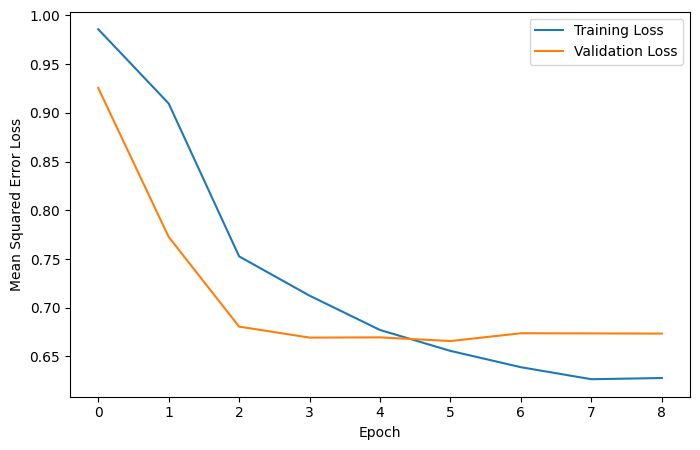

39/39 [==============================] - 10s 199ms/step - loss: 0.7973
Mean Squared Error on Test Set: 0.7973412871360779
39/39 [==============================] - 2s 62ms/step
Root Mean Squared Error (RMSE): 0.8929396884090649


In [145]:
## Train Test Split
# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
## Modelling: Neuronal Network
# Define the neural network architecture by using embeddings as they are recommended for categorical features in reco engines
# Embedding layers from the Keras library
embedding_layer_title = layers.Embedding(input_dim=len(df['book_title_encoded'].unique()), output_dim=8, input_length=1)
embedding_layer_description = layers.Embedding(input_dim=len(df['description_encoded'].unique()), output_dim=8, input_length=1)
embedding_layer_bestseller = layers.Embedding(input_dim=len(df['bestseller_encoded'].unique()), output_dim=8, input_length=1)
embedding_layer_genre = layers.Embedding(input_dim=len(df['genre_encoded'].unique()), output_dim=8, input_length=1)
embedding_layer_author = layers.Embedding(input_dim=len(df['book_author_encoded'].unique()), output_dim=8, input_length=1)
embedding_layer_publisher = layers.Embedding(input_dim=len(df['publisher_encoded'].unique()), output_dim=8, input_length=1)
embedding_layer_city = layers.Embedding(input_dim=len(df['city_encoded'].unique()), output_dim=8, input_length=1)
embedding_layer_country = layers.Embedding(input_dim=len(df['country_encoded'].unique()), output_dim=8, input_length=1)
embedding_layer_year = layers.Embedding(input_dim=len(df['year_of_publication_encoded'].unique()), output_dim=8, input_length=1)
embedding_layer_user = layers.Embedding(input_dim=len(df['user_id_encoded'].unique()), output_dim=8, input_length=1)

#flatten dimensions and use droptout
flatten_layer = layers.Flatten()
concatenated_layer = layers.Concatenate()
dense_1 = layers.Dense(64, activation='linear')
dropout_layer_1 = layers.Dropout(rate=dropout_rate)
dense_2 = layers.Dense(32, activation='linear')
#dense_3 = layers.Dense(32, activation='linear')
dense_output = layers.Dense(1, activation='linear')  # Output layer for regression


#Input layer
input_layer_title = layers.Input(shape=(1,))
input_layer_description = layers.Input(shape=(1,))
input_layer_bestseller = layers.Input(shape=(1,))
input_layer_genre = layers.Input(shape=(1,))
input_layer_author = layers.Input(shape=(1,))
input_layer_publisher = layers.Input(shape=(1,))
input_layer_city = layers.Input(shape=(1,))
input_layer_country = layers.Input(shape=(1,))
input_layer_year = layers.Input(shape=(1,))
input_layer_rating_count = layers.Input(shape=(1,))
input_layer_user = layers.Input(shape=(1,))
input_layer_average_rating = layers.Input(shape=(1,))

#Connect the layers for 'book_title'
embedded_output_title = embedding_layer_title(input_layer_title)
flattened_output_title = flatten_layer(embedded_output_title)
dropout_output_title = dropout_layer_1(flattened_output_title)

#Connect the layers for 'description'
embedded_output_description = embedding_layer_description(input_layer_description)
flattened_output_description = flatten_layer(embedded_output_description)
dropout_output_description = dropout_layer_1(flattened_output_description)

#Connect the layers for 'bestseller'
embedded_output_bestseller = embedding_layer_bestseller(input_layer_bestseller)
flattened_output_bestseller = flatten_layer(embedded_output_bestseller)
dropout_output_bestseller = dropout_layer_1(flattened_output_bestseller)

#Connect the layers for 'genre'
embedded_output_genre = embedding_layer_genre(input_layer_genre)
flattened_output_genre = flatten_layer(embedded_output_genre)
dropout_output_genre = dropout_layer_1(flattened_output_genre)

# Connect the layers for 'book_author'
embedded_output_author = embedding_layer_author(input_layer_author)
flattened_output_author = flatten_layer(embedded_output_author)
dropout_output_author = dropout_layer_1(flattened_output_author)

# Connect the layers for 'publisher'
embedded_output_publisher = embedding_layer_publisher(input_layer_publisher)
flattened_output_publisher = flatten_layer(embedded_output_publisher)
dropout_output_publisher = dropout_layer_1(flattened_output_publisher)

# Connect the layers for 'city'
embedded_output_city = embedding_layer_city(input_layer_city)
flattened_output_city = flatten_layer(embedded_output_city)
dropout_output_city = dropout_layer_1(flattened_output_city)

# Connect the layers for 'country'
embedded_output_country = embedding_layer_country(input_layer_country)
flattened_output_country = flatten_layer(embedded_output_country)
dropout_output_country = dropout_layer_1(flattened_output_country)

# Connect the layers for 'year_of_publication'
embedded_output_year = embedding_layer_year(input_layer_year)
flattened_output_year = flatten_layer(embedded_output_year)
dropout_output_year = dropout_layer_1(flattened_output_year)

dropout_rate = 0.5

# Adding dropout layers
dropout_layer_1 = layers.Dropout(rate=dropout_rate)
dropout_layer_2 = layers.Dropout(rate=dropout_rate)

# Connect the layers for 'user'
embedded_output_user = embedding_layer_user(input_layer_user)
flattened_output_user = flatten_layer(embedded_output_user)
dropout_output_user = dropout_layer_1(flattened_output_user)

# Include the 'rating_count' directly
flattened_output_rating_count = input_layer_rating_count

# Concatenate the flattened outputs (multiple)
concatenated_output = concatenated_layer([dropout_output_title, 
                                          dropout_output_description, 
                                          dropout_output_bestseller,
                                          dropout_output_genre, 
                                          dropout_output_author, 
                                          dropout_output_publisher,
                                          dropout_output_city, 
                                          dropout_output_country, 
                                          dropout_output_year, 
                                          dropout_output_user]) 

#concatenated_output = concatenated_layer([flattened_output_title, 
                                          #flattened_output_description, 
                                          #flattened_output_bestseller,
                                          #flattened_output_genre, 
                                          #flattened_output_author, 
                                          #flattened_output_publisher,
                                          #flattened_output_city, 
                                          #flattened_output_country, 
                                          #flattened_output_year, 
                                          #flattened_output_user]) 


# layers
dense_1_output = dense_1(concatenated_output)
dropout_dense_1_output = dropout_layer_2(dense_1(concatenated_output))
dense_2_output = dense_2(dropout_dense_1_output)
#dense_3_output = dense_2(dropout_dense_1_output)
output_layer = dense_output(dense_2_output)
#dense_1_output = dense_1(concatenated_output)
#dense_2_output = dense_2(dense_1_output)
#output_layer = dense_output(dense_2_output)

model = keras.Model(inputs=[input_layer_title, 
                            input_layer_description, 
                            input_layer_bestseller, 
                            input_layer_genre, 
                            input_layer_author, 
                            input_layer_publisher, 
                            input_layer_city, 
                            input_layer_country, 
                            input_layer_year, 
                            input_layer_rating_count,
                            input_layer_average_rating,
                            input_layer_user], 
                            outputs=output_layer) 

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

## Train Model
# Prepare the data for training
X_train = [train_data['year_of_publication_encoded'].values, 
           train_data['book_title_encoded'].values, 
           train_data['description_encoded'].values, 
           train_data['bestseller_encoded'].values,
           train_data['genre_encoded'].values,
           train_data['publisher_encoded'].values, 
           train_data['book_author_encoded'].values, 
           train_data['city_encoded'].values, 
           train_data['country_encoded'].values, 
           train_data['rating_count_encoded'].values,
           train_data['average_rating_encoded'].values,
           train_data['user_id_encoded'].values]

y_train = train_data['book_rating_encoded']
# Train the model and collect the training history and put it in a variable called history
history = model.fit(X_train, y_train, epochs=9, batch_size=100, validation_split=0.2)

# Plot training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

# Model Prediction
# Use the trained model for predictions
predictions = model.predict(X_train)

# Convert predictions to a DataFrame for easier manipulation
predictions_df = pd.DataFrame(predictions, columns=['predicted_rating_encoded'])

# check results of predictions of X_train
predictions
# Evaluation
# Evaluate the model on the test set
X_test = [
    test_data['book_title_encoded'].values,
    test_data['description_encoded'].values,
    test_data['bestseller_encoded'].values,
    test_data['genre_encoded'].values,
    test_data['book_author_encoded'].values,
    test_data['publisher_encoded'].values,
    test_data['city_encoded'].values,
    test_data['country_encoded'].values,
    test_data['year_of_publication_encoded'].values,
    test_data['rating_count_encoded'].values,
    test_data['average_rating_encoded'].values,
    test_data['user_id_encoded'].values
]
y_test = test_data['book_rating_encoded']
loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {loss}")

# Use the trained model for predictions
predictions = model.predict(X_test)
# Calculate RMSE
rmse = np.sqrt(loss)
print(f'Root Mean Squared Error (RMSE): {rmse}')
# check predictions of X_test
predictions
# Book Prediction
# Find the index of the highest predicted rating
index_of_highest_rating = predictions.argmax()

# Retrieve 'book_title' and 'book_author' values corresponding to the highest rating
highest_rated_book_title = test_data['book_title'].iloc[index_of_highest_rating]
highest_rated_book_author = test_data['book_author'].iloc[index_of_highest_rating]
highest_rated_book_publication = test_data['year_of_publication'].iloc[index_of_highest_rating]
highest_rated_book_rating = test_data['average_rating'].iloc[index_of_highest_rating]



You may like the book Three Fates from Nora Roberts published in 2004 with a book rating of 8 


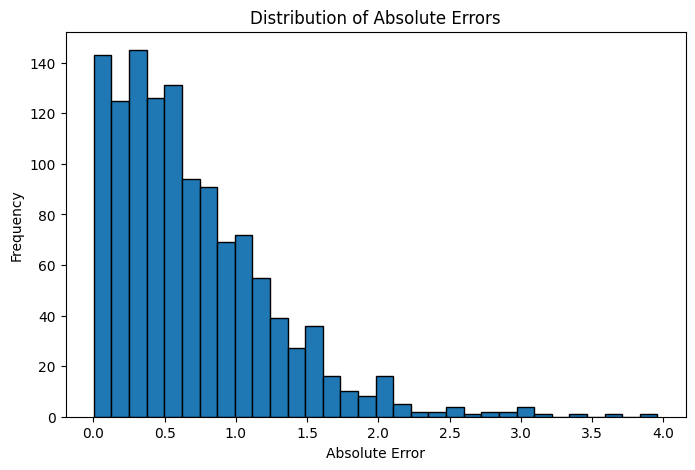

In [146]:

# Display the result
print(f"You may like the book {highest_rated_book_title} from {highest_rated_book_author} published in {highest_rated_book_publication} with a book rating of {highest_rated_book_rating} ")
# Error Analysis
# Calculate the absolute errors by taking the absolute difference between the predicted values (predictions.flatten()) 
#and the actual values (y_test.values). 
errors = np.abs(predictions.flatten() - y_test.values)

# Plot a histogram of the errors to visualize the distribution of absolute errors
plt.hist(errors, bins=32, edgecolor='black')
plt.title('Distribution of Absolute Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.show()


In [147]:

# Display some examples of predictions and actual ratings
examples_to_display = 10
random_indices = np.random.choice(len(errors), examples_to_display, replace=False)

for idx in random_indices:
    print(f"Predicted Rating: {predictions[idx][0]:.2f}, Actual Rating: {y_test.values[idx]:.2f}")
    print(f"Book Title: {test_data['book_title'].values[idx]}")
    print(f"Book Author: {test_data['book_author'].values[idx]}")
    print(f"---")

Predicted Rating: -0.06, Actual Rating: -0.62
Book Title: High Five
Book Author: Janet Evanovich
---
Predicted Rating: -1.52, Actual Rating: -1.78
Book Title: Black House
Book Author: Stephen King
---
Predicted Rating: 0.05, Actual Rating: 1.13
Book Title: Chicken Soup For The Soul
Book Author: Jack Canfield
---
Predicted Rating: 0.19, Actual Rating: 0.55
Book Title: Geek Love
Book Author: Katherine Dunn
---
Predicted Rating: -0.38, Actual Rating: -0.03
Book Title: The Bad Beginning
Book Author: Lemony Snicket
---
Predicted Rating: 0.20, Actual Rating: -0.03
Book Title: The Runaway Jury
Book Author: John Grisham
---
Predicted Rating: -0.39, Actual Rating: -1.20
Book Title: The Rainmaker
Book Author: John Grisham
---
Predicted Rating: -0.57, Actual Rating: -1.78
Book Title: Saving Faith
Book Author: David Baldacci
---
Predicted Rating: -0.54, Actual Rating: -1.20
Book Title: Angus, Thongs And Full-Frontal Snogging: Confessions Of Georgia Nicolson
Book Author: Louise Rennison
---
Predict

In [148]:
    
# User-specific Book Prediction
## Identify User
#find user that is above popularity and activity threshold
###threshold_user = df[df['user_id'].isin([rating_counts >= 30].index)]
####threshold_user.head(140)
## Get User ID from Streamlit App
# !pip install streamlit
# Get user Id from app
#user_id_from_app = input("user_idk")
## Prediction User-Specific 
# Step 1: Prepare input data for user_id == 110912, 6251, 6575, 7346
user_id_data = df[df['user_id'] ==  110912]
X_user = [
    user_id_data['book_title_encoded'].values,
    user_id_data['description_encoded'].values,
    user_id_data['bestseller_encoded'].values,
    user_id_data['genre_encoded'].values,
    user_id_data['book_author_encoded'].values,
    user_id_data['publisher_encoded'].values,
    user_id_data['city_encoded'].values,
    user_id_data['country_encoded'].values,
    user_id_data['year_of_publication_encoded'].values,
    user_id_data['rating_count_encoded'].values,
    user_id_data['average_rating_encoded'].values,
    user_id_data['user_id_encoded'].values
]
user_id_data.head(3)
# Step 2: Use the trained model to predict ratings for each book for the user
predicted_ratings_user = []
for index, row in user_id_data.iterrows():
    X_user_single_book = [
        np.array([row['book_title_encoded']]),
        np.array([row['description_encoded']]),
        np.array([row['bestseller_encoded']]),
        np.array([row['genre_encoded']]),
        np.array([row['book_author_encoded']]),
        np.array([row['publisher_encoded']]),
        np.array([row['city_encoded']]),
        np.array([row['country_encoded']]),
        np.array([row['year_of_publication_encoded']]),
        np.array([row['rating_count_encoded']]),
        np.array([row['average_rating_encoded']]),
        np.array([row['user_id_encoded']]),
    ]

    y_test = user_id_data['book_rating_encoded']


    predictions = model.predict(X_user_single_book)
    predicted_ratings_user.append(predictions[0][0])


1/1 [==============================] - 0s 18ms/step


In [149]:

# Step 3: Add predicted ratings to user_id_110912_data
user_id_data['book_rating_encoded'] = predicted_ratings_user

# Step 4: Filter out books the user has already rated
user_rated_books = user_id_data['book_title_encoded'].values
unrated_books_mask = ~df['book_title_encoded'].isin(user_rated_books)
unrated_books_data = df[unrated_books_mask]

# Step 5: Create a new DataFrame with book information and predicted ratings
recommended_books = unrated_books_data[['book_title', 'book_author', 'genre', 'year_of_publication', 'average_rating']]


# Step 6: Sort the DataFrame by predicted rating in descending order
#sorted_books = recommended_books.sort_values(by='book_rating', ascending=False)

# Step 7: Recommend the top two books
top_five_recommendations = recommended_books.head(5).sort_values(by='average_rating', ascending=False)

# Step 8: Print the recommendations with the required information
print("Top 5 Book Recommendations especially for you:")
for index, row in top_five_recommendations.iterrows():
    print(f"Book Title: {row['book_title']}")
    print(f"Book Author: {row['book_author']}")
    print(f"Genre: {row['genre']}")
    print(f"Year of Publication: {row['year_of_publication']}")
    print(f"Average Book Rating: {row['average_rating']}")
    print("------------------------")


Top 5 Book Recommendations especially for you:
Book Title: To Kill A Mockingbird
Book Author: Harper Lee
Genre: Romance
Year of Publication: 1988
Average Book Rating: 9
------------------------
Book Title: Pride And Prejudice
Book Author: Jane Austen
Genre: Comedy
Year of Publication: 1983
Average Book Rating: 8
------------------------
Book Title: Girl With A Pearl Earring
Book Author: Tracy Chevalier
Genre: Crime
Year of Publication: 2001
Average Book Rating: 7
------------------------
Book Title: Empire Falls
Book Author: Richard Russo
Genre: Romance
Year of Publication: 2002
Average Book Rating: 7
------------------------
Book Title: Three Junes
Book Author: Julia Glass
Genre: Crime
Year of Publication: 2003
Average Book Rating: 7
------------------------
